In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

### 2 задание
В файле test_2 лежит результат теста, который был нацелен на увеличение суммы чека клиента. 


Изучите результаты теста и сделайте вывод, увеличилась сумма чека или нет. В качестве решения - ноутбук, в котором построено распределение параметра в группах и проверены нужные критерии.

In [93]:
data = pd.read_csv('test_2.csv')

In [94]:
data.head()

,group,client_id,avg_sum
0,test,1,156.686451
1,test,2,342.625859
2,test,3,79.712120
3,test,4,493.110807
4,test,5,124.135016


In [95]:
data.shape

(600, 3)

In [96]:
data.dtypes

group         object
client_id      int64
avg_sum      float64
dtype: object

In [97]:
data.group.describe()

count      600
unique       2
top       test
freq       306
Name: group, dtype: object

In [98]:
control = data[data.group == "control"].avg_sum
test = data[data.group == "test"].avg_sum

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'test')

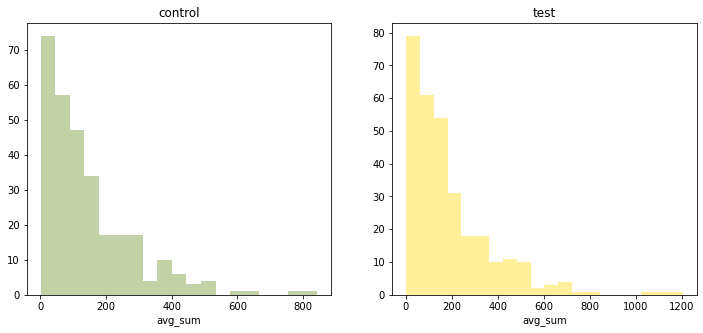

In [99]:
f = plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(control, color = 'olivedrab', hist = True, kde = False, ax = ax)
ax.set_title('control')

ax=f.add_subplot(122)
sns.distplot(test, color = 'gold', hist = True, kde = False, ax=ax)
ax.set_title('test')

In [100]:
#### Проверим данные на нормальность

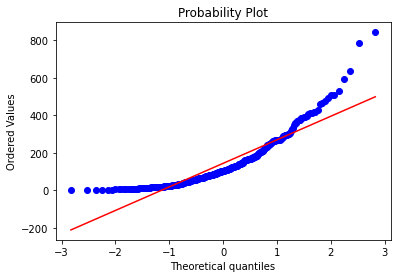

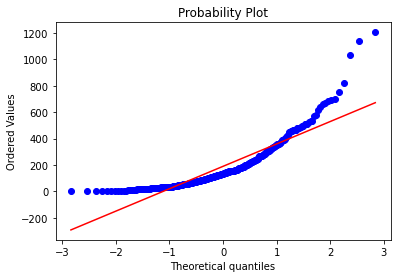

In [101]:
stats.probplot(control, dist="norm", plot=plt)
plt.show()

stats.probplot(test, dist="norm", plot=plt)
plt.show()

#### Критерий Шапиро-Уилка

In [102]:
groups = [control, test]

In [103]:
# Критерий Шапиро-Уилка
# используется для проверки гипотезы H_0:
# «случайная величина X распределена нормально» 
# является одним наиболее эффективных критериев проверки нормальности.
for group in groups:
    W_value,p_value = stats.shapiro(group)
    if p_value > 0.05:
        print('Normal','W=',round(W_value,4),'p-value',round(p_value,4))
    else:
        print('Not normal','W=',round(W_value,4),'p-value',round(p_value,4))

Not normal W= 0.8395 p-value 0.0
Not normal W= 0.8082 p-value 0.0


### Тест

 Мы ожидаем, что сумма чека в тестовой группе будет выше. Важно понять, увеличилась сумма чека или нет. Поэтому мы формулируем двустороннюю альтернативную гипотезу!  -->
 

* H0 - сумма чека в группах не имет значимых различий;
* H1 - сумма чека в группах больше в тестовой выборке

Определим уровень значимости.
* Берем a = 0.05

###   Непараметрический критерий Манна - Уитни

Суммы чека распределены не нормально. Один из популярных методов сравнения в двух независимых группах - ***критерий Манна-Уитни***.

**Непараметрические** критерии не требуют соответствия какому-либо из распределений. Непараметрические критерии заменяют реальные значения признака рангами (номерами элементов в упорядоченной по возрастанию выборке). Мы все вычисляем на основе полученных рангов, таким образом, мы и правда не привязываемся к параметрам распределения, как в случае с критерием Стьюдента

**Критерий Манна-Уитни** представляет непараметрическую альтернативу t-критерия для независимых выборок. Преимущество его состоит в том, что мы отказываемся от предположения нормальности распределения и одинаковых дисперсий. Необходимо, чтобы данные были измерены как минимум в порядковой шкале. Относится к ранговым критериям.

Интерпретация теста по существу похожа на интерпретацию результатов t-критерия для независимых выборок, за исключением того, что U критерий вычисляется, как сумма индикаторов попарного сравнения элементов первой выборки с элементами второй выборки. U критерий - наиболее мощная (чувствительная) непараметрическая альтернатива t-критерия для независимых выборок; фактически, в некоторых случаях он имеет даже большую мощность, чем t-критерий.

**Важная поправка** при больших значениях выборки распределение U-критерия быстро сходится к нормальному распределению, поэтому для интерпретации рассчитывается z-значение, если количество элементов в выборках больше 60

***Формула для расчета U-критерия (статистики теста):***

![u](https://i.pinimg.com/564x/7f/40/70/7f407010828abd65c1602e0472a8a096.jpg)

**Из двух выборок получим одну,отсортируем и затем расставим ранги**. Максимальное значение в группе имеет первый ранг и так далее.

In [104]:
# проставлем ранги (номера элементов в упорядоченной по возрастанию выборке)
data['rank'] = data['avg_sum'].rank(ascending = False, numeric_only = True)

In [105]:
data.head()

,group,client_id,avg_sum,rank
0,test,1,156.686451,233.0
1,test,2,342.625859,79.0
2,test,3,79.712120,383.0
3,test,4,493.110807,30.0
4,test,5,124.135016,290.0


In [106]:
# Дальше необходимо вычислить сумму рангов
data.groupby('group')['rank'].sum()

group
control    94308.0
test       85992.0
Name: rank, dtype: float64

In [107]:
# разделяем обратно на 2 выборки
a = data[data['group'] == 'control']['avg_sum']
b = data[data['group'] == 'test']['avg_sum']
rank_a = data[data['group'] == 'control']['rank'].sum()
rank_b = data[data['group'] == 'test']['rank'].sum()

![u](https://i.pinimg.com/564x/7f/40/70/7f407010828abd65c1602e0472a8a096.jpg)

In [108]:
# Вычисляем критерий по формуле
def U(a,b,rank_a,rank_b):
    number_of_values_a = a.count() #N1
    number_of_values_b = b.count() #N2
    all_values = number_of_values_a * number_of_values_b #N1*N2
    max_rank = max(rank_a,rank_b) #T_x, x=1,2
    max_count = float() #N_x , x=1,2
    if rank_a > rank_b:
        max_count = number_of_values_a
    else:
        max_count = number_of_values_b
    return (all_values + (max_count * (max_count + 1))/2) - max_rank

In [109]:
print('U-критерий =',U(a,b,rank_a,rank_b))

U-критерий = 39021.0


Теперь это надо как-то интерпретировать и вывести p-value. Выше упоминали, что при размере выборки > 60 распределение U-критерия отлично сходится к нормальному, поэтому мы рассчитываем z-значение для нашего U-критерия и по нему получаем наш заветный p-value и результат т.к. Z-тест (z-критерий Фишера) — проверяет гипотезы, основанные на нормальном распределении

***Z - значение*** - это мера относительного разброса наблюдаемого или измеренного значения, которая показывает, сколько стандартных отклонений составляет его разброс относительного среднего значения. Это безразмерный статистический показатель используемый для сравнения значений разной размерности или шкалой измерений.

![z](https://i.pinimg.com/originals/9f/b5/36/9fb536c3c368b01f17b4231c4b842951.png)

In [110]:
def z_score(a,b):
    m_u = (a.count()*b.count())/2 
    sigma_u = np.sqrt((a.count()*b.count())*(a.count()+b.count()+1)/12)
    return (U(a,b,rank_a,rank_b) - m_u)/sigma_u

In [111]:
round(stats.norm.cdf(z_score(a,b)) * 2.0,4)

0.005

In [112]:
def MannWhitney(a,b,rank_a,rank_b):
    U = min((rank_a - (a.count() * (a.count() + 1))/2),(rank_b - (b.count() * (b.count() + 1))/2))
    m_u = (a.count()*b.count())/2
    sigma_u = np.sqrt((a.count()*b.count())*(a.count()+ b.count()+1)/12)
    z_score = (U - m_u)/sigma_u
    p_val = stats.norm.cdf(z_score) 
    if p_val > 0.05:
        print('Нет статистически значимой разницы и оснований отвергнуть гипотезу H0','\nU-критерий:',U,
              '\nz_score',z_score,'\np-value',round(p_val,4))
    else:
        print('Есть статистически значимая разница, гипотеза H0 отвергается','\nU-критерий:',U,
              '\nz_score',z_score,'\np-value',round(p_val,4))
        return

In [113]:
MannWhitney(a,b,rank_a,rank_b)

Есть статистически значимая разница, гипотеза H0 отвергается 
U-критерий: 39021.0 
z_score -2.808265278778519 
p-value 0.0025


Также воспользуемся библиотекой scipy для расчета U-критерия и p-value

In [114]:
stat, p_val = stats.mannwhitneyu(a,b,alternative = 'two-sided')
if p_val > 0.05:
    print('Статистически значимой разницы нет','\np-value', round(p_val,4),'\nU-критерий', stat)
else:
    print('Разница статистически значима','\np-value', round(p_val,4),'\nU-критерий', stat)

Разница статистически значима 
p-value 0.005 
U-критерий 39021.0
